# BIOS512 Assignment #5

🌬 For this assignment we are going to work with [Canada wind turbine](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/readme.md) data from TidyTuesday. 💨

Use `read_csv` to load the data from the TidyTuesday GitHub repository. The project URL is can be found at [https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/).

In [4]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [5]:
wind = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-10-27/wind-turbine.csv',
col_types = cols()
)

In [6]:
wind |> head(20)

objectid,province_territory,project_name,total_project_capacity_mw,turbine_identifier,turbine_number_in_project,turbine_rated_capacity_k_w,rotor_diameter_m,hub_height_m,manufacturer,model,commissioning_date,latitude,longitude,notes
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,Alberta,Optimist Wind Energy,0.90,OWE1,1/2,150,23,30,Bonus,AN 150/30,1993,49.52535,-114.0548,NA
2,Alberta,Castle River Wind Farm,44.00,CRW1,1/60,600,44,40,Vestas,V44/600,1997,49.51264,-114.0357,NA
3,Alberta,Waterton Wind Turbines,3.78,WWT1,1/6,600,44,50,Vestas,V44/600,1998,49.23307,-113.6549,NA
4,Alberta,Waterton Wind Turbines,3.78,WWT2,2/6,600,44,50,Vestas,V44/600,1998,49.23303,-113.6302,NA
5,Alberta,Waterton Wind Turbines,3.78,WWT3,3/6,600,44,50,Vestas,V44/600,1998,49.21755,-113.6802,NA
6,Alberta,Waterton Wind Turbines,3.78,WWT4,4/6,660,47,50,Vestas,V47/660,2000,49.21773,-113.6579,NA
7,Alberta,Cowley North,19.50,CON1,1/15,1300,60,46,Nordex,N60/1300,2001,49.56876,-114.1104,NA
8,Alberta,Cowley North,19.50,CON2,2/15,1300,60,46,Nordex,N60/1300,2001,49.56788,-114.1097,NA
9,Alberta,Cowley North,19.50,CON3,3/15,1300,60,46,Nordex,N60/1300,2001,49.56696,-114.1103,NA


Each row in the table represents a single turbine.

Make a bar chart 📊 **sorted by frequency** of turbine count per province territory. (Hint: `fct_infreq` will sort your factor levels by frequency for subsequent plotting)

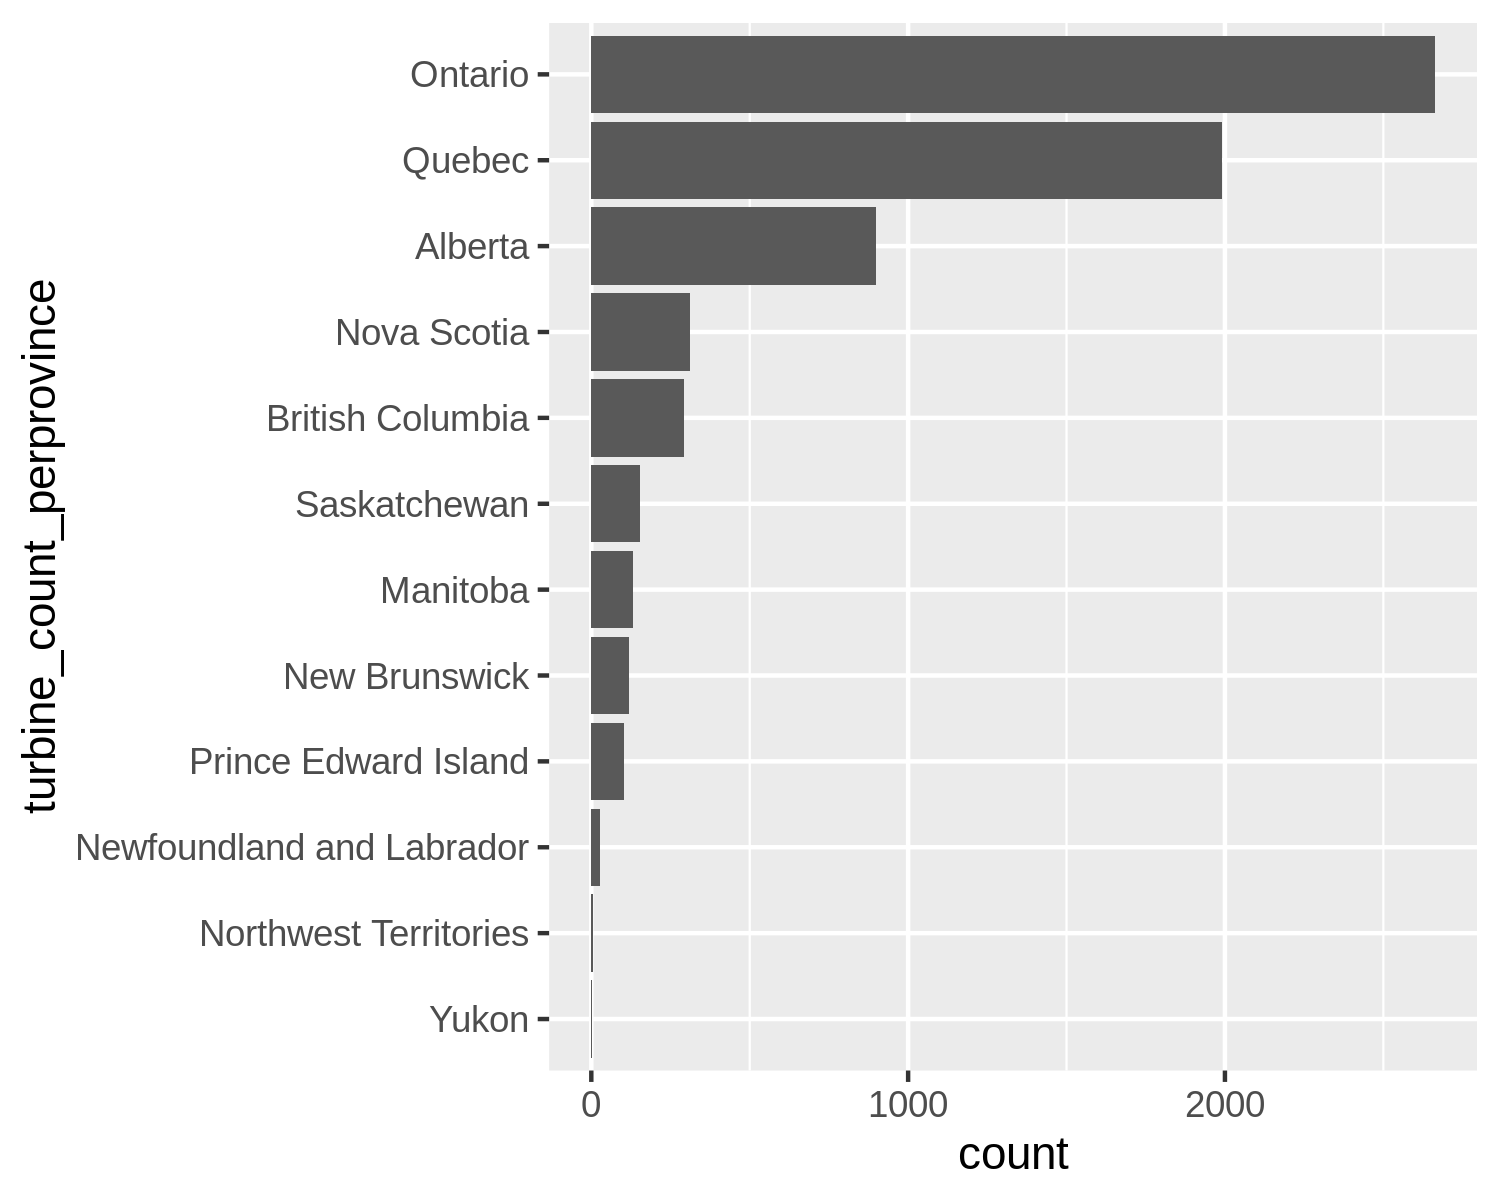

In [11]:
wind_sorted = wind |> 
mutate(turbine_count_perprovince = province_territory %>% fct_infreq() %>% fct_rev())

p = ggplot(wind_sorted, aes(x = turbine_count_perprovince))

p = p + geom_bar() + coord_flip()

p

Make a bar chart **sorted by frequency** of turbine count per manufacturer. **Group the low frequency manufacturers into an `Other` category**.

**Bonus:** Can you force the `Other` category to be the last bar? 

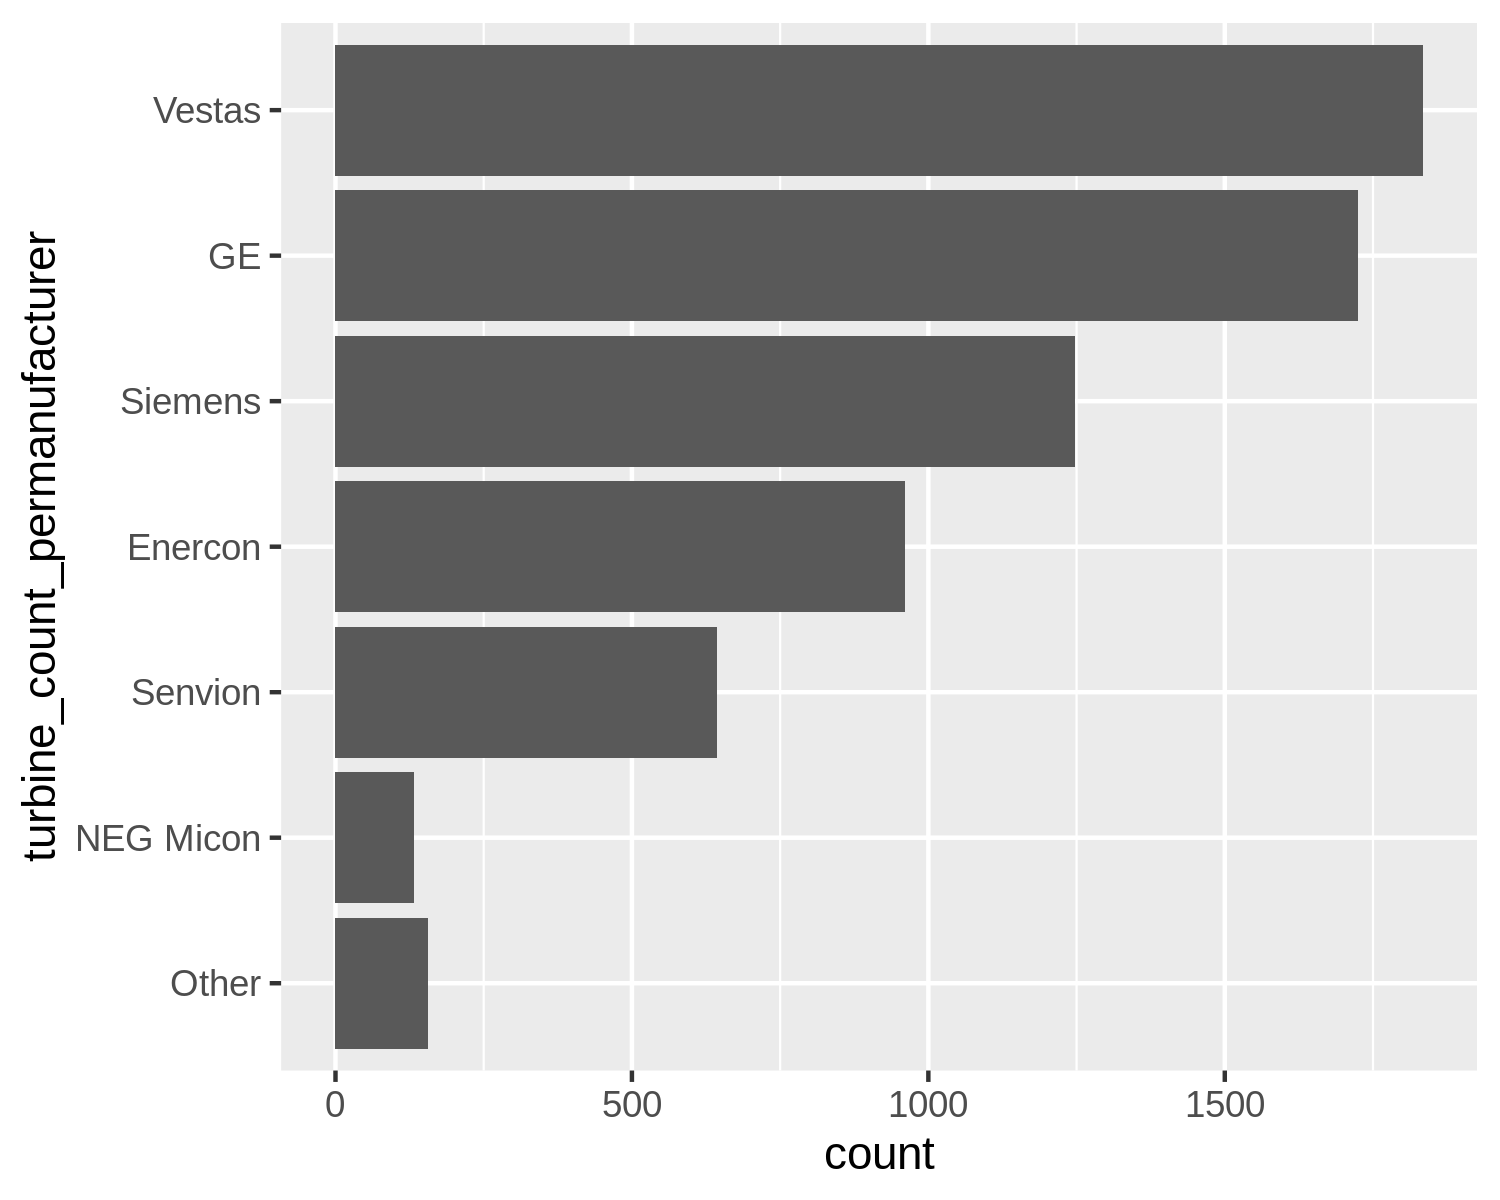

In [17]:
wind_sorted2 = wind |> 
mutate(turbine_count_permanufacturer = manufacturer %>% 
       fct_lump(n = 6) %>% 
       fct_infreq() %>% 
       fct_relevel('Other', after= Inf) %>% 
       fct_rev())

p = ggplot(wind_sorted2, aes(x = turbine_count_permanufacturer))

p = p + geom_bar() + coord_flip()

p